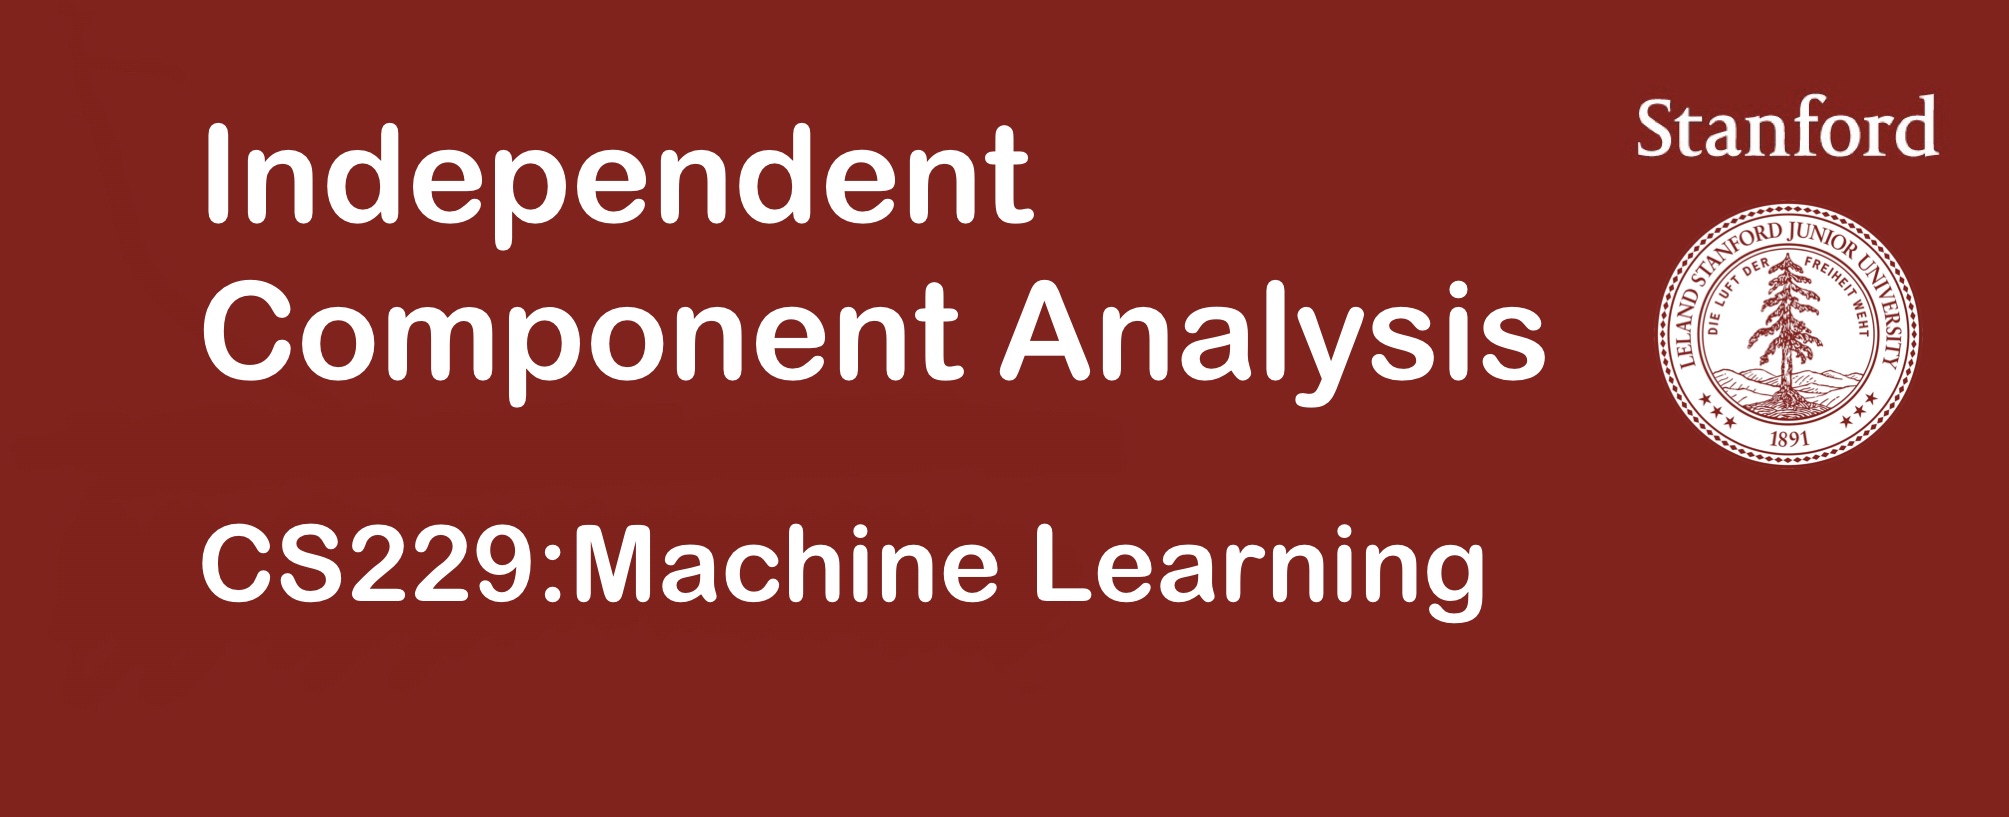

## 1. 问题的提出

**「独立成分分析(IndependentComponentAnalysis)ICA」** 与 PCA 类似，也会找到一个新基底来表示数据，但两者的目标完全不同。

ICA 的一个典型案例是“鸡尾酒宴会问题“：在一个宴会上有 n 个人同时说话，并且房间里的麦克风只接收到了这 n 个声音的叠加，假定该房间有 n 个麦克风，则每个麦克风记录了说话者声音的不同叠加（由于距离不同）。我们希望基于这些麦克风记录的声音，来还原原始的 n 名说话者的声音信号。

该问题可以用如下数学公式进行表达：给定 $n$ 个独立信号源 $s\in\mathbb R^n$，我们观察到的数据为：

$$x=As$$

其中 $A$ 是一个未知的方阵，称为 **「混合矩阵(Mixing Matrix)」**；重复的观察可以得到一个数据集 $\{x^{(i)};i=1,...,m\}$。我们的目标是通过观察数据恢复出原始数据 $s^{(i)}$（$x^{(i)}=As^{(i)}$）。

在鸡尾酒宴会问题中：

* $s^{(i)}$ 是一个 $n$ 维向量，$s_j^{(i)}$ 是说话者 $j$ 在时间 $i$ 发出的声音

* * $x^{(i)}$ 是一个 $n$ 维向量，$x_j^{(i)}$ 是说话者 $j$ 在时间 $i$ 记录的声音

定义 $W=A^{-1}$ 为 **「分离矩阵(unmixing matrix)」**，则我们的目标是找到 $W$ ，从而给定麦克风的记录 $x^{(i)}$，我们通过下式恢复出原始数据：

$$s^{(i)}=W x^{(i)}$$

为了符号方便，我们令 $w_i^T$ 表示 $W$ 的第 $i$ 行，则

$$W=\begin{bmatrix}
w_1^T \\ 
\vdots\\
w_n^T
\end{bmatrix}$$

因此，$w_i \in \mathbb R^n$ ，原始数据的第 $j$ 个分量可以表示为 $s_j^{(i)}=w_j^T x^{(i)}$。

## 2. ICA 的不确定性

实际上，如果仅给定观察数据而缺乏相关的先验知识，则恢复的原始数据会存在不确定性。

第一点不确定性是原始数据的 **「排列(permutation)」**。仅给定 $x^{(i)}$，我们无法区分求得的分离矩阵是 $W$ 还是 $PW$，$P$ 是置换矩阵，每行每列均只包含 1 个 1，用于变换向量中元素的排列顺序。大部分情况下，原始数据的排列顺序对结果并没有影响。

第二点不确定性是原始数据的 **「规模(scaling)」**。如果将 $A$ 的某一列乘以系数 $\alpha$，则对应的原始数据分量会变为原来的 $1/\alpha$，在仅给定 $x^{(i)}$ 的情况下，我们同样无法发现这一点。与之前类似，这对最终结果的影响并不大（鸡尾酒问题中只是音量发生了变化）。

除了上面两点不确定性之外，原始数据 $s$ 还需要是 **「非高斯分布」** 的。假定 $n=2$，$s$ 满足多元高斯分布 $s\in \mathcal{N}(0,I)$（多元高斯分布的各分量也是独立的），则其密度函数的图像是一个以原点为中心旋转对称的圆形。

假定我们观测到了某个 $x=As$，则 $x$ 也满足高斯分布 $x\in\mathcal{N}(0,AA^T)$

$$\text{Cov}(x)=E[xx^T]=E[Ass^TA^T]=AA^T I=AA^T$$

令 $R$ 是一个任意正交矩阵（旋转矩阵），则令 $A'=AR$，基于 $A'$ 观测得到的 $x'=A's$ 将满足同样的正态分布 $x'\in\mathcal{N}(0,AA^T)$，这会导致我们无法求解出准确的混合矩阵。

只要数据是非高斯分布且数据量足够，就有可能恢复出其 $n$ 个独立的原始数据。

## 3. 密度函数与线性变换

在推导 ICA 算法之前，先简单介绍一下概率密度函数的线性变换，概率密度函数的积分为 1（表示概率之和）。

一般来说，如果 $s$ 是一个密度为 $p_s$ 的向量值分布，$x=As$ 且 $A$ 是一个可逆方阵，那么 $x$ 的密度函数为：

$$p_x(x)=p_s(Wx)|W|$$

其中 $W=A^{-1}$。上式可以利用逆矩阵与行列式的关系以及概率密度函数的性质进行证明。

4 ICA 算法
下面将正式介绍 ICA 算法。这里使用极大似然估计进行推导，原始论文中使用了更加复杂的方法（informax principal）。

假定每个数据源 $s_j$ 的概率密度函数为 $p_s$ ，则数据源 $s$ 的联合分布为：

$$p(s)=\prod_{j=1}^n p_s(s_j)$$

上式保证了各个数据源是独立的。利用上一节的结论，我们有：

$$p(x)=\prod_{j=1}^n p_s(w_j^T x)\cdot|W|$$

我们知道，给定一个实数随机变量 $z$ ，其 **「累积分布函数(cdf)」** 定义为：

$$F(z_0)=P(z\leq z_0)=\int_{-\infty}^{z_0}p_z(z)dz$$

密度函数与累积分布函数的关系为：$p_z(z)=F'(z)$。因此，为了确定 $s_j$ 的密度函数，我们只需要确定其累积分布函数。

可以看出，累积分布函数是一个从 0 到 1 的单增函数。基于之前的讨论，我们不能选择高斯分布的 cdf 作为累积分布函数，这里将选择 **「sigmoid」** 函数（在没有先验知识的情况下这是一个被证明对大多数问题都适用的选择）：

$$g(s)=\frac{1}{(1+e^{-s})}$$

此处默认了原始数据的均值为 0。

在我们的模型中，待优化的参数为分离矩阵 $W$，给定一个训练集 $\{x^{(i)};i=1,...,m\}$，其对数似然函数为：

$$\ell(W)=\sum_{i=1}^m\Big(\sum_{j=1}^n \text{log} g'(w_j^Tx)+\text{log}|W|\Big)$$

利用 $\triangledown_W|W|=|W|(W^{-1})^T$ 进行求导，可得到如下随机梯度上升的更新规则：

$$W:=W+\alpha\Big(\begin{bmatrix}
1-2g(w_1^Tx^{(i)})\\ 
1-2g(w_2^Tx^{(i)})
\vdots\\
1-2g(w_n^Tx^{(i)})
\end{bmatrix}{x^{(i)}}^T+{\big(W^T\big)}^{-1}\Big)$$

$\alpha$ 是学习速率。最后，当算法收敛后，通过 $s^{(i)}=Wx^{(i)}$ 即可恢复出原始数据。

注意：在计算似然函数时我们假设了各个训练样本（不是每个训练样本的分量）之间相互「独立」，然而对于语音信号等数据来说，该假设并不能成立。不过在数据量足够大时，算法仍然能取得不错的效果。在不独立的情况下，在运行随机梯度上升前事先打乱原始数据，能够提升收敛的速度。